# Batch Gradient Descent

In [ ]:
import matplotlib.pyplot as plt

# Original Data

In [ ]:
X_original = [1100,1400,1425,1550,1600,1700,1750,1800,1875,2000,2100,2250,2300,2400,2450,2600,2800,2900,3000,3150,3300]
Y_original = [199000,245000,230000,215000,280000,295000,345000,315000,325000,360000,350000,385000,390000,425000,415000,455000,465000,495000,510000,545000,570000]

# Plotting Original Data Points

Text(0, 0.5, 'Price')

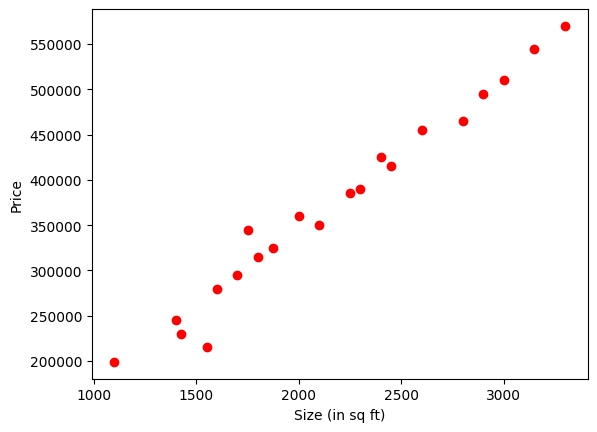

In [ ]:
plt.scatter(X_original,Y_original,color='red')
plt.xlabel("Size (in sq ft)")
plt.ylabel("Price")

# Normalization

In [ ]:
X_train = [x/1000 for x in X_original]
Y_train = [y/100000 for y in Y_original]

# Initial Guesses of Model Parameters

In [ ]:
w = 1.5
b = -300

In [ ]:
alpha=0.3 # Learning Rate
n_epochs = 400 # Number of iterations
losses=[] # To hold loss value after every iteration

# Stochastic Gradient Descent

In [ ]:
def calculate_loss(Z,Y):
  J=0
  for idx,z in enumerate(Z):
    J+=(z-Y[idx])**2
  J/=(2*len(Z))
  losses.append(J)
  return J


In [ ]:
def update_parameters(Z,X,Y,w,b,alpha):
  dJ_dw=0
  dJ_db=0
  m=len(X)
  for i in range(len(X)):
    dJ_dw+=(Z[i]-Y[i])*X[i]
    dJ_db+=(Z[i]-Y[i])
  dJ_dw/=m
  dJ_db/=m
  w -= alpha*dJ_dw
  b -= alpha*dJ_db
  return (w,b)

In [ ]:
def forward_prop(X,Y,w,b,alpha):
  Z=[]
  for x in X:
    Z.append(w*x + b)
  losses.append(calculate_loss(Z,Y))
  w,b=update_parameters(Z,X,Y,w,b,alpha)
  return (w,b)

In [ ]:
def prediction(X,w,b):
  X = [x/1000 for x in X]
  Y_pred=[]
  for x in X:
    Y_pred.append((w*x+b)*100000)
  return Y_pred

In [ ]:
for i in range (n_epochs):
  w,b = forward_prop(X_train,Y_train,w,b,alpha)
print(f'Losses: {losses[0]},{losses[1]},{losses[2]}......{losses[n_epochs-3]},{losses[n_epochs-2]},{losses[n_epochs-1]}') # Decreasing losses with every iteration shows SGD is working correctly

Losses: 45142.49241755953,45142.49241755953,29565.077771897842......1.3484719444495634,1.2990180915668947,1.2990180915668947


# Final Model Parameters

In [ ]:
print(f"m : {w*100}")
print(f"c : {b*100000}") # Since the model was trained on normalized data, model parameters need to be scaled to find parameters for actual data

m : 176.9041210786778
c : -11600.758277689745


# Plotting the best fit line

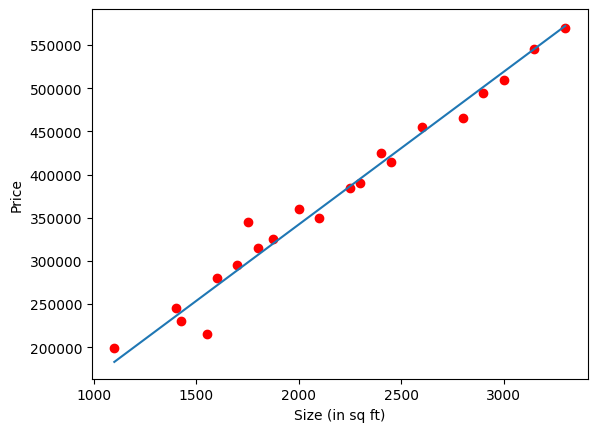

In [ ]:
predictions=prediction(X_original,w,b)
plt.plot(X_original,predictions)
plt.scatter(X_original,Y_original,color='red')
plt.xlabel("Size (in sq ft)")
plt.ylabel("Price")
plt.show()

# Testing

In [ ]:
X_test = [2500,]

In [ ]:
y_pred = prediction(X_test,w,b)

In [ ]:
print(f'{y_pred[0]:.2f}')

430659.54


##### The price of the house with 2500 sq ft area is 430659.54